In [26]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [69]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
twitter_CSU = pd.read_json('CSU/CSU_2018-06-21.json', 
                           orient='records', 
                           lines=True, 
                           convert_dates=True, 
                           keep_default_dates=True)
tl = twitter_CSU.shape[0]

In [5]:
print(twitter_CSU.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18824 entries, 0 to 18823
Data columns (total 32 columns):
contributors                 0 non-null float64
coordinates                  4 non-null object
created_at                   18824 non-null datetime64[ns]
entities                     18824 non-null object
extended_entities            1005 non-null object
favorite_count               18824 non-null int64
favorited                    18824 non-null bool
geo                          4 non-null object
id                           18824 non-null int64
id_str                       18824 non-null int64
in_reply_to_screen_name      3476 non-null object
in_reply_to_status_id        3321 non-null float64
in_reply_to_status_id_str    3321 non-null float64
in_reply_to_user_id          3476 non-null float64
in_reply_to_user_id_str      3476 non-null float64
is_quote_status              18824 non-null bool
lang                         18824 non-null object
metadata                     18824 n

In [6]:
twitter_CSU = twitter_CSU.set_index(pd.DatetimeIndex(twitter_CSU['created_at']))
twitter_CSU = twitter_CSU.drop([
#                                 'created_at', 
                                'id', 
                                'in_reply_to_status_id', 
                                'in_reply_to_user_id', 
                                'quoted_status_id'
                               ], 
                               axis=1)

In [7]:
# print(twitter_CSU.info())
# tweets_per_id = twitter_CSU['id_str'].value_counts()
# print(tweets_per_id[tweets_per_id > 1])

In [8]:
german_twitters = twitter_CSU[twitter_CSU.lang =='de']
# print(german_twitters.tail())
# print(german_twitters.info())

In [9]:
# german_twitters.plot(x='favorite_count', y='retweet_count', kind='scatter')

In [10]:
CSU_all_tweets = german_twitters['text']

In [11]:
print(CSU_all_tweets[0])

RT @MartinSchulz: In einer Zeit, in der Europa ein stabiles Deutschland braucht, führt die CSU mutwillig eine Regierungskrise herbei. Nicht…


In [12]:
CSU_tweets = []
for tweet in CSU_all_tweets:
    if '@' not in tweet:
        CSU_tweets.append(tweet)
        
print(CSU_tweets[300])

print(len(CSU_all_tweets))
print(len(CSU_tweets))    

Asylstreit - Die CSU schrumpelt zum Merkel-weg-Projekt https://t.co/5yuCALd4CV
15760
2143


In [24]:
pd.set_option('display.max_column', 50)

In [57]:
twitter_CSU_small = twitter_CSU.drop(columns = ['contributors', 
                                                'coordinates', 
                                                'extended_entities', 
                                                'in_reply_to_screen_name', 
                                                'in_reply_to_user_id_str', 
                                                'is_quote_status', 
                                                'metadata',
                                                'quoted_status',
                                                'quoted_status_id_str',
                                                'retweeted',
                                                'source',
                                                'retweeted_status',
                                                'withheld_in_countries',
                                                'withheld_scope',
                                                'place',
                                                'in_reply_to_status_id_str'
                                                ])

In [58]:
twitter_CSU_small.head(2)

,created_at,entities,favorite_count,favorited,geo,id_str,lang,possibly_sensitive,retweet_count,text,truncated,user,has_loc,location
created_at,,,,,,,,,,,,,,
2018-06-21 23:59:43,2018-06-21 23:59:43,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,None,1009949013054033920,en,0.0,0,Something else to use\n\nhttps://t.co/10fWmUDJsj,False,"{'id': 25055836, 'id_str': '25055836', 'name':...",True,"Ohio, USA"
2018-06-21 23:58:53,2018-06-21 23:58:53,"{'hashtags': [], 'symbols': [], 'user_mentions...",21,False,None,1009948805192732672,en,0.0,0,CSU...we are so ready for you!! Can’t wait to ...,True,"{'id': 2306934692, 'id_str': '2306934692', 'na...",True,happy place


In [31]:
twitter_CSU.iloc[324].entities

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'SASsoftware',
   'name': 'SAS Software',
   'id': 112464786,
   'id_str': '112464786',
   'indices': [17, 29]},
  {'screen_name': 'CLE_State',
   'name': 'Cleveland State',
   'id': 23472546,
   'id_str': '23472546',
   'indices': [35, 45]}],
 'urls': [{'url': 'https://t.co/bSULiEGCtX',
   'expanded_url': 'https://twitter.com/i/web/status/1009930231619244035',
   'display_url': 'twitter.com/i/web/status/1…',
   'indices': [117, 140]}]}

In [32]:
twitter_CSU.iloc[0].metadata

{'iso_language_code': 'en', 'result_type': 'recent'}

In [33]:
twitter_CSU.iloc[int(np.random.random()*tl)].user

{'id': 43175535,
 'id_str': '43175535',
 'name': 'Marian T. Wirth',
 'screen_name': 'mtwirth',
 'location': 'Duesseldorf, Germany',
 'description': "'More German than currywurst' -@colin93f. Here to germansplain the world. Avid librocubicularist.",
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 1608,
 'friends_count': 1361,
 'listed_count': 166,
 'created_at': 'Thu May 28 19:19:55 +0000 2009',
 'favourites_count': 32723,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': False,
 'statuses_count': 124870,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'C6E2EE',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme2/bg.gif',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme2/bg.gif',
 'profile_background_tile': True,
 'profile_image_url': 'http://pbs.twimg.com/profile_image

In [34]:
def has_location(x):
    """
    use with apply
    """
    if x['location']:
        return True
    else:
        return False

In [35]:
def extract_location(x):
    """
    use with apply
    """
    return x['location']

In [36]:
twitter_CSU['has_loc'] = twitter_CSU.user.map(has_location)

In [37]:
twitter_CSU.loc[:, 'has_loc'].value_counts(dropna=False)

True     12791
False     6033
Name: has_loc, dtype: int64

In [59]:
twitter_CSU_small['location'] = twitter_CSU.user.map(extract_location)

# is the same twitter_CSU['location'] = twitter_CSU.user.map(lambda x: x['location'])

In [60]:
twitter_CSU['contributors'].value_counts().head(50)

Series([], Name: contributors, dtype: int64)

In [61]:
twitter_CSU_small['location'].value_counts().head(50)

                                  6033
Deutschland                        795
Berlin                             507
Berlin, Deutschland                394
Germany                            323
München                            175
Bayern, Deutschland                157
München, Bayern                    151
Hamburg, Deutschland               133
Baden-Württemberg, Deutschland     114
Berlin, Germany                    112
首席ハウス                               86
Hamburg                             80
Europa                              59
Köln, Deutschland                   55
Fort Collins, CO                    48
Nächstebreck-West, Wuppertal        47
weltweit                            46
Europe                              44
Wien, Österreich                    41
Dresden                             41
Köln                                41
Österreich                          40
Düsseldorf                          40
Nordrhein-Westfalen                 40
Bleckede                 

In [62]:
twitter_CSU_small.head(2)

,created_at,entities,favorite_count,favorited,geo,id_str,lang,possibly_sensitive,retweet_count,text,truncated,user,has_loc,location
created_at,,,,,,,,,,,,,,
2018-06-21 23:59:43,2018-06-21 23:59:43,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,False,None,1009949013054033920,en,0.0,0,Something else to use\n\nhttps://t.co/10fWmUDJsj,False,"{'id': 25055836, 'id_str': '25055836', 'name':...",True,"Ohio, USA"
2018-06-21 23:58:53,2018-06-21 23:58:53,"{'hashtags': [], 'symbols': [], 'user_mentions...",21,False,None,1009948805192732672,en,0.0,0,CSU...we are so ready for you!! Can’t wait to ...,True,"{'id': 2306934692, 'id_str': '2306934692', 'na...",True,happy place


In [77]:
twitter_CSU_small['location_corrected'] = pd.Series()

In [87]:
for x in twitter_CSU_small.location:
    if x is 'Berlin_Deutschland':
        location.replace('Berlin_Deutschland', 'Berlin', inplace = True)

In [111]:
        
print(twitter_CSU_small.location_corrected.value_counts())

Series([], Name: location_corrected, dtype: int64)


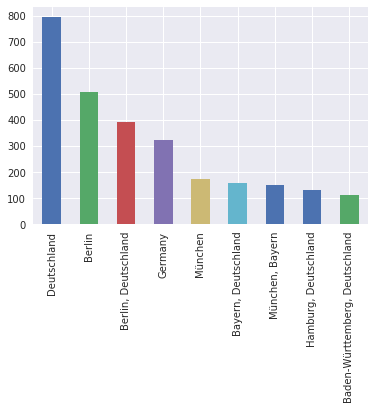

In [80]:
location = twitter_CSU_small.loc[:, 'location']
location_count = location.value_counts()
location_count.iloc[1:10].plot(kind = 'bar', )
plt.show()

In [89]:
twitter_CSU_small.keys()

Index(['created_at', 'entities', 'favorite_count', 'favorited', 'geo',
       'id_str', 'lang', 'possibly_sensitive', 'retweet_count', 'text',
       'truncated', 'user', 'has_loc', 'location', 'location_corrected'],
      dtype='object')

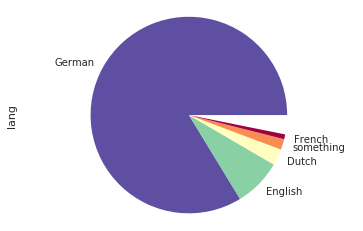

In [110]:
languages = twitter_CSU_small.loc[:, 'lang']
#print(languages.value_counts())
relative_language = languages.value_counts()/len(languages)
#print(relative_language)
# take 5 max values and sum the rest up:

relative_language.head(5).plot.pie(labels = ['German', 'English', 'Dutch', 'something', 'French'], cmap = 'Spectral_r')
plt.axis('equal')
plt.show()